In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
#Create empty lists to store the data we are about to collect from the website
#We would like to collect the names of the cars, the mileage, the price, the rating, the number of reviews the car received

car_name = []
car_mileage = []
car_price = []
car_rating = []
car_ratingcount = []

In [ ]:
#We need to create a variable to store the url of the website, I'm calling this variable website_url. We then need to send a request to the website
#and scrape multiple pages

for i in range(1,2):
    website_url = "https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=nissan&maximum_distance=20&mileage_max=&models[]=nissan-rogue&monthly_payment=&page=" + str(i) + "&page_size=20&sort=best_match_desc&stock_type=used&trims[]=nissan-rogue-platinum&year_max=&year_min=&zip=02215"
    web_request = requests.get(website_url)

    # Create an object to store the html elements of the request
    soup = BeautifulSoup(web_request.content,'html.parser')

    # Create a list that contains the results of the web page
    results_list = soup.find_all('div', {'class':'vehicle-card'})

    for i in results_list:

        #get the names of the cars. If the name of the car is not present, append 'n/a' to the list
        try:
            car_name.append(i.find('h2').get_text())
        except:
            car_name.append('n/a')

        #get the mileage of the cars
        try:
            car_mileage.append(i.find('div', {'class' : 'mileage'}).get_text())
        except:
            car_mileage.append('n/a')

        #get the price of the car
        try:
            car_price.append(i.find('span', {'class' : 'primary-price'}).get_text())
        except:
            car_price.append('n/a')

        #get the rating
        try:
            car_rating.append(i.find('span', {'class': 'sds-rating__count'}).get_text())
        except:
            car_rating.append('n/a')

        #get the number of reviews
        try:
            car_ratingcount.append(i.find('span', {'class': 'sds-rating__link'}).get_text())
        except:
            car_ratingcount.append('n/a')

In [ ]:
# Create a DataFrame

car_info = pd.DataFrame({'Name': car_name, 'Mileage': car_mileage, 'Price': car_price, 'Rating': car_rating, 'Reviews': car_ratingcount})

In [ ]:
#print the DataFrame
car_info

,Name,Mileage,Price,Rating,Reviews
0,2021 Nissan Rogue Platinum,"15,143 mi.","$31,968",4.7,"(1,606 reviews)"
1,2021 Nissan Rogue Platinum,"14,010 mi.","$29,847",4.3,"(3,270 reviews)"
2,2021 Nissan Rogue Platinum,"32,096 mi.","$27,954",4.6,(80 reviews)
3,2021 Nissan Rogue Platinum,"32,246 mi.","$28,545",4.7,"(3,392 reviews)"
4,2022 Nissan Rogue Platinum,"20,277 mi.","$29,500",4.6,"(1,343 reviews)"
5,2023 Nissan Rogue Platinum,"11,021 mi.","$34,488",4.7,"(3,392 reviews)"
6,2021 Nissan Rogue Platinum,"23,208 mi.","$28,500",4.1,(190 reviews)
7,2021 Nissan Rogue Platinum,"33,424 mi.","$28,998",4.7,"(3,392 reviews)"
8,2021 Nissan Rogue Platinum,"14,957 mi.","$30,128",4.7,"(1,606 reviews)"
9,2021 Nissan Rogue Platinum,"24,718 mi.","$28,500",4.1,(190 reviews)


In [ ]:
#Let's clean the data frame

#The first thing we should do is to edit the Reviews column

car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.strip('reviews)').strip('(')) #remove the word reviews and the parentheses
car_info['Rating'] = car_info['Rating'].apply(lambda x:x.replace('n/a', '0')) #remove 'n/a'
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace('n/a', '0'))
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace('mi.', '')) #remove 'mi.' from the mileage column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('$', '')) # remove the $ from the Price column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Price column
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Mileage column
car_info['Reviews'] = car_info['Reviews'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Reviews column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('Not Priced', '0')) #there's one car where the value is 'not priced', this should be converted to a number

In [ ]:
car_info

,Name,Mileage,Price,Rating,Reviews
0,2021 Nissan Rogue Platinum,15143,31968,4.7,1606
1,2021 Nissan Rogue Platinum,14010,29847,4.3,3270
2,2021 Nissan Rogue Platinum,32096,27954,4.6,80
3,2021 Nissan Rogue Platinum,32246,28545,4.7,3392
4,2022 Nissan Rogue Platinum,20277,29500,4.6,1343
5,2023 Nissan Rogue Platinum,11021,34488,4.7,3392
6,2021 Nissan Rogue Platinum,23208,28500,4.1,190
7,2021 Nissan Rogue Platinum,33424,28998,4.7,3392
8,2021 Nissan Rogue Platinum,14957,30128,4.7,1606
9,2021 Nissan Rogue Platinum,24718,28500,4.1,190


In [ ]:
#The Name column has a lot of important data on the Year, Company, Vehicle make and model

car_info[["Year", "Company", "Make", "Model"]] = car_info["Name"].str.split(" ", expand=True)

In [ ]:
car_info

,Name,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,2021 Nissan Rogue Platinum,15143,31968,4.7,1606,2021,Nissan,Rogue,Platinum
1,2021 Nissan Rogue Platinum,14010,29847,4.3,3270,2021,Nissan,Rogue,Platinum
2,2021 Nissan Rogue Platinum,32096,27954,4.6,80,2021,Nissan,Rogue,Platinum
3,2021 Nissan Rogue Platinum,32246,28545,4.7,3392,2021,Nissan,Rogue,Platinum
4,2022 Nissan Rogue Platinum,20277,29500,4.6,1343,2022,Nissan,Rogue,Platinum
5,2023 Nissan Rogue Platinum,11021,34488,4.7,3392,2023,Nissan,Rogue,Platinum
6,2021 Nissan Rogue Platinum,23208,28500,4.1,190,2021,Nissan,Rogue,Platinum
7,2021 Nissan Rogue Platinum,33424,28998,4.7,3392,2021,Nissan,Rogue,Platinum
8,2021 Nissan Rogue Platinum,14957,30128,4.7,1606,2021,Nissan,Rogue,Platinum
9,2021 Nissan Rogue Platinum,24718,28500,4.1,190,2021,Nissan,Rogue,Platinum


In [ ]:
# I would like to change the position of the columns
car_info = car_info.iloc[:,[0,6,7,8,5,2,1,3,4]]

In [ ]:
car_info

,Name,Company,Make,Model,Year,Price,Mileage,Rating,Reviews
0,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,31968,15143,4.7,1606
1,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,29847,14010,4.3,3270
2,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,27954,32096,4.6,80
3,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,28545,32246,4.7,3392
4,2022 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2022,29500,20277,4.6,1343
5,2023 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2023,34488,11021,4.7,3392
6,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,28500,23208,4.1,190
7,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,28998,33424,4.7,3392
8,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,30128,14957,4.7,1606
9,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,28500,24718,4.1,190


In [ ]:
# Drop the column Name and its no longer needed
car_info = car_info.drop(["Name"], axis = 1)

In [ ]:
car_info

,Company,Make,Model,Year,Price,Mileage,Rating,Reviews
0,Nissan,Rogue,Platinum,2021,31968,15143,4.7,1606
1,Nissan,Rogue,Platinum,2021,29847,14010,4.3,3270
2,Nissan,Rogue,Platinum,2021,27954,32096,4.6,80
3,Nissan,Rogue,Platinum,2021,28545,32246,4.7,3392
4,Nissan,Rogue,Platinum,2022,29500,20277,4.6,1343
5,Nissan,Rogue,Platinum,2023,34488,11021,4.7,3392
6,Nissan,Rogue,Platinum,2021,28500,23208,4.1,190
7,Nissan,Rogue,Platinum,2021,28998,33424,4.7,3392
8,Nissan,Rogue,Platinum,2021,30128,14957,4.7,1606
9,Nissan,Rogue,Platinum,2021,28500,24718,4.1,190


In [ ]:
#You can export the DataFrame to excel if you choose to proceed with excel
car_info.to_excel('multiple_pages.xlsx', index = False)

In [ ]:
#You can export the DataFrame to a csv file if needed
car_info.to_csv('multiple_pages.csv', index = False)

In [ ]:
#Let's determine the datatypes for each column within our car_info DataFrame
car_info.dtypes

Company    object
Make       object
Model      object
Year       object
Price      object
Mileage    object
Rating     object
Reviews    object
dtype: object

In [ ]:
#All of the columns are listed as objects. We need to change the datatypes for at least some of these columns

#Year should be converted to int
car_info["Year"] = car_info["Year"].astype(int)

In [ ]:
car_info["Price"] = car_info["Price"].astype(float)

In [ ]:
car_info["Mileage"] = car_info["Mileage"].astype(float)

In [ ]:
car_info["Rating"] = car_info["Rating"].astype(float)

In [ ]:
car_info["Reviews"] = car_info["Reviews"].astype(int)

In [ ]:
car_info.dtypes

Company     object
Make        object
Model       object
Year         int64
Price      float64
Mileage    float64
Rating     float64
Reviews      int64
dtype: object

In [ ]:
car_info

,Company,Make,Model,Year,Price,Mileage,Rating,Reviews
0,Nissan,Rogue,Platinum,2021,31968.0,15143.0,4.7,1606
1,Nissan,Rogue,Platinum,2021,29847.0,14010.0,4.3,3270
2,Nissan,Rogue,Platinum,2021,27954.0,32096.0,4.6,80
3,Nissan,Rogue,Platinum,2021,28545.0,32246.0,4.7,3392
4,Nissan,Rogue,Platinum,2022,29500.0,20277.0,4.6,1343
5,Nissan,Rogue,Platinum,2023,34488.0,11021.0,4.7,3392
6,Nissan,Rogue,Platinum,2021,28500.0,23208.0,4.1,190
7,Nissan,Rogue,Platinum,2021,28998.0,33424.0,4.7,3392
8,Nissan,Rogue,Platinum,2021,30128.0,14957.0,4.7,1606
9,Nissan,Rogue,Platinum,2021,28500.0,24718.0,4.1,190


In [ ]:
#create a new column called Age (Current year - Year)
current_year = datetime.datetime.now().year
car_info['Age'] = current_year - car_info['Year']
car_info.head()

,Company,Make,Model,Year,Price,Mileage,Rating,Reviews,Age
0,Nissan,Rogue,Platinum,2021,31968.0,15143.0,4.7,1606,3
1,Nissan,Rogue,Platinum,2021,29847.0,14010.0,4.3,3270,3
2,Nissan,Rogue,Platinum,2021,27954.0,32096.0,4.6,80,3
3,Nissan,Rogue,Platinum,2021,28545.0,32246.0,4.7,3392,3
4,Nissan,Rogue,Platinum,2022,29500.0,20277.0,4.6,1343,2


Task 4-2

In [ ]:
#average price
average_price = car_info['Price'].mean()
print("Average Price:", average_price)

Average Price: 30676.59259259259


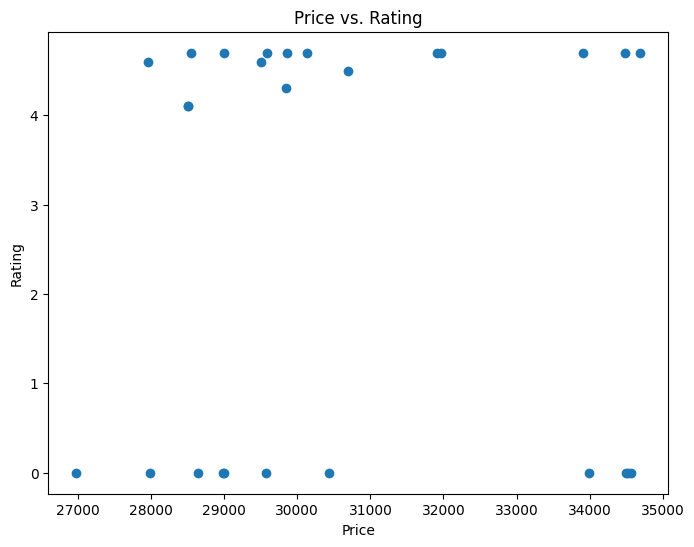

In [ ]:
#Scatter Plot Price vs. Rating

plt.figure(figsize=(8, 6))
plt.scatter(car_info['Price'], car_info['Rating'])
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

<ipython-input-27-9174231d3068>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


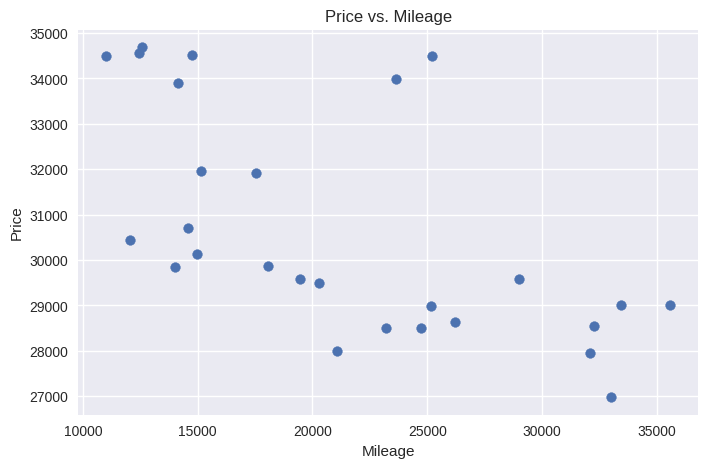

In [ ]:
#visualize the relationship between price and mileage
plt.style.use('seaborn')

plt.figure(figsize=(8, 5))
plt.scatter(car_info['Mileage'], car_info['Price'])
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
correlation_matrix = car_info[['Rating', 'Reviews', 'Price', 'Mileage', 'Age']].corr()
correlation_matrix


,Rating,Reviews,Price,Mileage,Age
Rating,1.000000,0.748399,-0.032634,-0.145526,0.166596
Reviews,0.748399,1.000000,0.165374,-0.171149,-0.022499
Price,-0.032634,0.165374,1.000000,-0.622300,-0.884726
Mileage,-0.145526,-0.171149,-0.622300,1.000000,0.503097
Age,0.166596,-0.022499,-0.884726,0.503097,1.000000


Task 4-3: Depreciation - regression



In [ ]:
#depreciation - regression
X = car_info['Age']
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variable
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate
depreciation_rate = results.params['Age']
print("Depreciation Rate:", depreciation_rate)

Depreciation Rate: -2485.770072992702


In [ ]:
X = car_info[['Age', 'Mileage']]
y = car_info['Price']

X = sm.add_constant(X)  # Add a constant term to the predictor variables
model = sm.OLS(y, X)  # Create an ordinary least squares (OLS) model
results = model.fit()  # Fit the model

# Get the depreciation rate for Age and Mileage
depreciation_rate_age = results.params['Age']
depreciation_rate_mileage = results.params['Mileage']
print("Depreciation Rate (Age):", depreciation_rate_age)
print("Depreciation Rate (Mileage):", depreciation_rate_mileage)

Depreciation Rate (Age): -2150.41707722567
Depreciation Rate (Mileage): -0.07744017823880026


# New York Ananlysis

In [ ]:
#Create empty lists to store the data we are about to collect from the website
#We would like to collect the names of the cars, the mileage, the price, the rating, the number of reviews the car received

car_name_ny = []
car_mileage_ny = []
car_price_ny = []
car_rating_ny = []
car_ratingcount_ny = []

In [ ]:
#We need to create a variable to stor the url of the website, I'm calling this variable website_url. We then need to send a request to the website
#and scrape multiple pages

for i in range(1,3):
    website_url = "https://www.cars.com/shopping/results/?dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=nissan&maximum_distance=20&mileage_max=&models[]=nissan-rogue&monthly_payment=&page=" + str(i) + "&page_size=20&sort=best_match_desc&stock_type=used&trims[]=nissan-rogue-platinum&year_max=&year_min=&zip=10005"

    #make request to the website
    web_request = requests.get(website_url)

    # Create an object to store the html elements of the request
    soup = BeautifulSoup(web_request.content,'html.parser')

    # Create a list that contains the results of the web page
    results_list = soup.find_all('div', {'class':'vehicle-card'})

    for i in results_list:

        #get the names of the cars. If the name of the car is not present, append 'n/a' to the list
        try:
            car_name_ny.append(i.find('h2').get_text())
        except:
            car_name_ny.append('n/a')

        #get the mileage of the cars
        try:
            car_mileage_ny.append(i.find('div', {'class' : 'mileage'}).get_text())
        except:
            car_mileage_ny.append('n/a')

        #get the price of the car
        try:
            car_price_ny.append(i.find('span', {'class' : 'primary-price'}).get_text())
        except:
            car_price_ny.append('n/a')

        #get the rating
        try:
            car_rating_ny.append(i.find('span', {'class': 'sds-rating__count'}).get_text())
        except:
            car_rating_ny.append('n/a')

        #get the number of reviews
        try:
            car_ratingcount_ny.append(i.find('span', {'class': 'sds-rating__link'}).get_text())
        except:
            car_ratingcount_ny.append('n/a')

In [ ]:
# Create a DataFrame

car_info_ny = pd.DataFrame({'Name': car_name_ny, 'Mileage': car_mileage_ny, 'Price': car_price_ny, 'Rating': car_rating_ny, 'Reviews': car_ratingcount_ny})

In [ ]:
#print the DataFrame
car_info_ny.head()

,Name,Mileage,Price,Rating,Reviews
0,2022 Nissan Rogue Platinum,"74,888 mi.","$23,369",4.8,(794 reviews)
1,2021 Nissan Rogue Platinum,"26,218 mi.","$26,499",4.7,(895 reviews)
2,2021 Nissan Rogue Platinum,"43,872 mi.","$25,789",4.2,(653 reviews)
3,2021 Nissan Rogue Platinum,"25,359 mi.","$27,678",4.2,(653 reviews)
4,2022 Nissan Rogue Platinum,"6,279 mi.","$29,490",4.7,(816 reviews)


In [ ]:
#Let's clean the data frame

#The first thing we should do is to edit the Reviews column

car_info_ny['Reviews'] = car_info_ny['Reviews'].apply(lambda x:x.strip('reviews)').strip('(')) #remove the word reviews and the parentheses
car_info_ny['Rating'] = car_info_ny['Rating'].apply(lambda x:x.replace('n/a', '0')) #remove 'n/a'
car_info_ny['Reviews'] = car_info_ny['Reviews'].apply(lambda x:x.replace('n/a', '0'))
car_info_ny['Mileage'] = car_info_ny['Mileage'].apply(lambda x:x.replace('mi.', '')) #remove 'mi.' from the mileage column
car_info_ny['Price'] = car_info_ny['Price'].apply(lambda x:x.replace('$', '')) # remove the $ from the Price column
car_info_ny['Price'] = car_info_ny['Price'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Price column
car_info_ny['Mileage'] = car_info_ny['Mileage'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Mileage column
car_info_ny['Reviews'] = car_info_ny['Reviews'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Reviews column
car_info_ny['Price'] = car_info_ny['Price'].apply(lambda x:x.replace('Not Priced', '0')) #there's one car where the value is 'not priced', this should be converted to a number

In [ ]:
#The Name column has a lot of important data on the Year, Company, Vehicle make and model

car_info_ny[["Year", "Company", "Make", "Model"]] = car_info_ny["Name"].str.split(" ", expand=True)
car_info_ny.head()

,Name,Mileage,Price,Rating,Reviews,Year,Company,Make,Model
0,2022 Nissan Rogue Platinum,74888,23369,4.8,794,2022,Nissan,Rogue,Platinum
1,2021 Nissan Rogue Platinum,26218,26499,4.7,895,2021,Nissan,Rogue,Platinum
2,2021 Nissan Rogue Platinum,43872,25789,4.2,653,2021,Nissan,Rogue,Platinum
3,2021 Nissan Rogue Platinum,25359,27678,4.2,653,2021,Nissan,Rogue,Platinum
4,2022 Nissan Rogue Platinum,6279,29490,4.7,816,2022,Nissan,Rogue,Platinum


In [ ]:
# I would like to change the position of the columns
car_info_ny = car_info_ny.iloc[:,[0,6,7,8,5,2,1,3,4]]
car_info_ny.head()

,Name,Company,Make,Model,Year,Price,Mileage,Rating,Reviews
0,2022 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2022,23369,74888,4.8,794
1,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,26499,26218,4.7,895
2,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,25789,43872,4.2,653
3,2021 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2021,27678,25359,4.2,653
4,2022 Nissan Rogue Platinum,Nissan,Rogue,Platinum,2022,29490,6279,4.7,816


In [ ]:
# Drop the column Name and its no longer needed
car_info_ny = car_info_ny.drop(["Name"], axis = 1)
car_info_ny.head()

,Company,Make,Model,Year,Price,Mileage,Rating,Reviews
0,Nissan,Rogue,Platinum,2022,23369,74888,4.8,794
1,Nissan,Rogue,Platinum,2021,26499,26218,4.7,895
2,Nissan,Rogue,Platinum,2021,25789,43872,4.2,653
3,Nissan,Rogue,Platinum,2021,27678,25359,4.2,653
4,Nissan,Rogue,Platinum,2022,29490,6279,4.7,816


In [ ]:
#You can export the DataFrame to excel if you choose to proceed with excel
car_info_ny.to_excel('multiple_pages_ny.xlsx', index = False)

In [ ]:
#You can export the DataFrame to a csv file if needed
car_info_ny.to_csv('multiple_pages_ny.csv', index = False)

In [ ]:
#All of the columns are listed as objects. We need to change the datatypes for at least some of these columns

#Year should be converted to int
car_info_ny["Year"] = car_info_ny["Year"].astype(int)

In [ ]:
car_info_ny["Price"] = car_info_ny["Price"].astype(float)

In [ ]:
car_info_ny["Mileage"] = car_info_ny["Mileage"].astype(float)

In [ ]:
car_info_ny["Rating"] = car_info_ny["Rating"].astype(float)

In [ ]:
car_info_ny["Reviews"] = car_info_ny["Reviews"].astype(int)

In [ ]:
#Let's determine the datatypes for each column within our car_info DataFrame
car_info_ny.dtypes

Company     object
Make        object
Model       object
Year         int64
Price      float64
Mileage    float64
Rating     float64
Reviews      int64
dtype: object

In [ ]:
#create a new column called Age (Current year - Year)
current_year = datetime.datetime.now().year
car_info_ny['Age'] = current_year - car_info_ny['Year']
car_info_ny.head()

,Company,Make,Model,Year,Price,Mileage,Rating,Reviews,Age
0,Nissan,Rogue,Platinum,2022,23369.0,74888.0,4.8,794,2
1,Nissan,Rogue,Platinum,2021,26499.0,26218.0,4.7,895,3
2,Nissan,Rogue,Platinum,2021,25789.0,43872.0,4.2,653,3
3,Nissan,Rogue,Platinum,2021,27678.0,25359.0,4.2,653,3
4,Nissan,Rogue,Platinum,2022,29490.0,6279.0,4.7,816,2


Task 4-2

In [ ]:
#average price
average_price_ny = car_info_ny['Price'].mean()
print("Average Price:", average_price_ny)

Average Price: 26932.926829268294


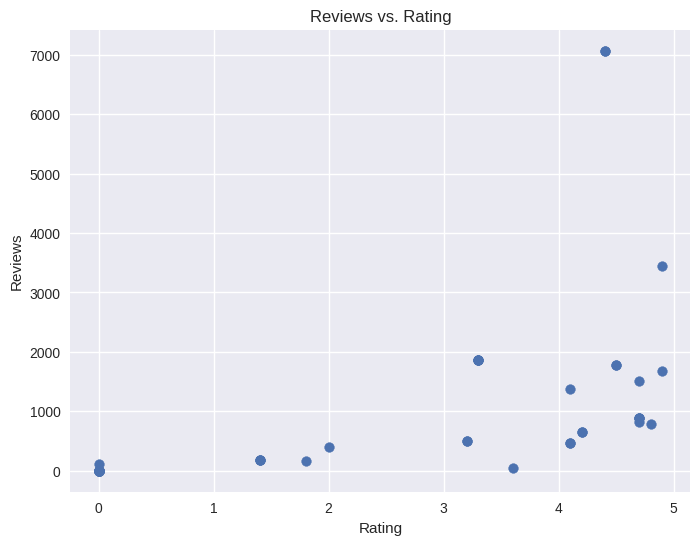

In [ ]:
#Scatter Plot Reviews vs. Rating


plt.figure(figsize=(8, 6))
plt.scatter(car_info_ny['Rating'], car_info_ny['Reviews'])
plt.title('Reviews vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

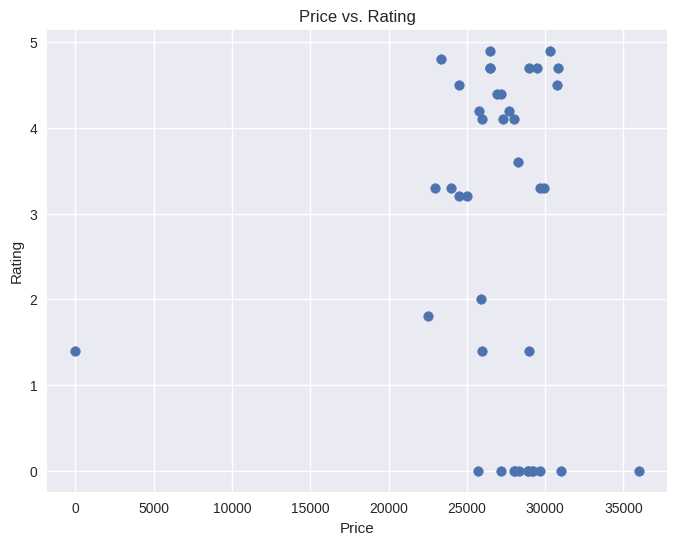

In [ ]:
#Scatter Plot Price vs. Rating

plt.figure(figsize=(8, 6))
plt.scatter(car_info_ny['Price'], car_info_ny['Rating'])
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

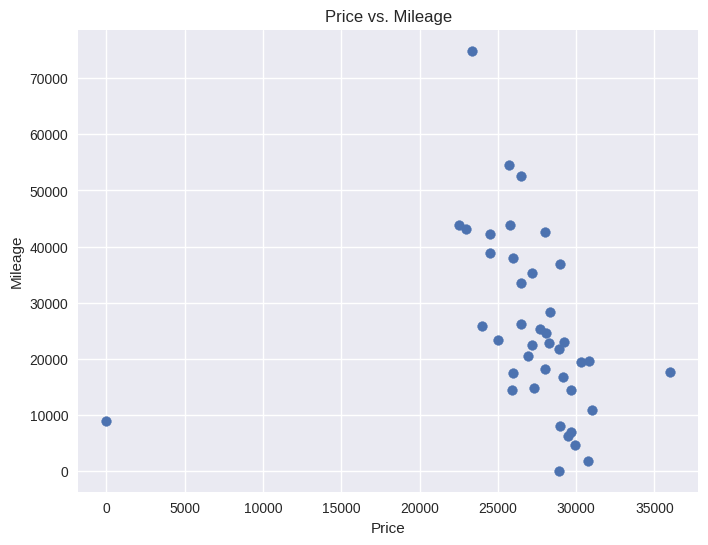

In [ ]:
#Scatter Plot Price vs. Mileage
plt.figure(figsize=(8, 6))
plt.scatter(car_info_ny['Price'], car_info_ny['Mileage'])
plt.title('Price vs. Mileage')
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.show()

<ipython-input-52-6e6115aa1811>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


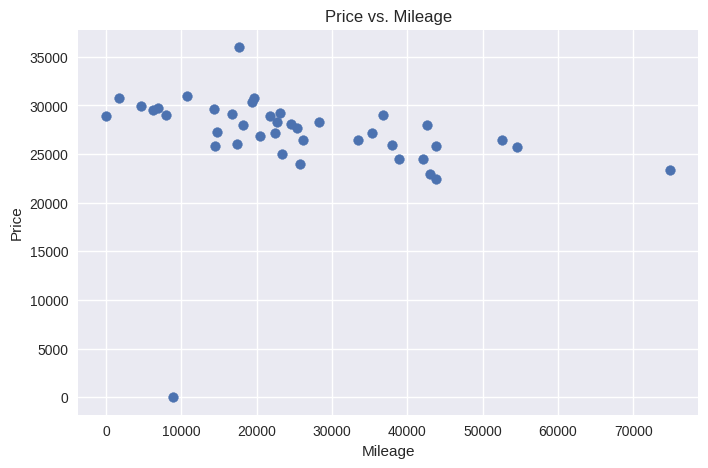

In [ ]:
#visualize the relationship between price and mileage
plt.style.use('seaborn')

plt.figure(figsize=(8, 5))
plt.scatter(car_info_ny['Mileage'], car_info_ny['Price'])
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
correlation_matrix_ny = car_info_ny[['Rating', 'Reviews', 'Price', 'Mileage', 'Age']].corr()
correlation_matrix_ny


,Rating,Reviews,Price,Mileage,Age
Rating,1.000000,0.520778,-0.047471,0.167095,0.196510
Reviews,0.520778,1.000000,0.008161,0.009369,-0.004953
Price,-0.047471,0.008161,1.000000,-0.176174,-0.168049
Mileage,0.167095,0.009369,-0.176174,1.000000,0.462078
Age,0.196510,-0.004953,-0.168049,0.462078,1.000000


Task 4-3: Depreciation - regression



In [ ]:
#depreciation - regression
X_ny = car_info_ny['Age']
y_ny = car_info_ny['Price']

X_ny = sm.add_constant(X_ny)  # Add a constant term to the predictor variable
model_ny = sm.OLS(y_ny, X_ny)  # Create an ordinary least squares (OLS) model
results_ny = model.fit()  # Fit the model

# Get the depreciation rate
depreciation_rate_ny = results_ny.params['Age']
print("Depreciation Rate New York:", depreciation_rate_ny)

Depreciation Rate New York: -2150.41707722567


In [ ]:
X_ny = car_info_ny[['Age', 'Mileage']]
y_ny = car_info_ny['Price']

X_ny = sm.add_constant(X_ny)  # Add a constant term to the predictor variables
model_ny = sm.OLS(y_ny, X_ny)  # Create an ordinary least squares (OLS) model
results_ny = model_ny.fit()  # Fit the model

# Get the depreciation rate for Age and Mileage
depreciation_rate_age_ny = results_ny.params['Age']
depreciation_rate_mileage_ny = results_ny.params['Mileage']
print("Depreciation Rate (Age):", depreciation_rate_age_ny)
print("Depreciation Rate (Mileage):", depreciation_rate_mileage_ny)

Depreciation Rate (Age): -742.5709796235943
Depreciation Rate (Mileage): -0.03955483921275703
